<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_YB_WEEK12_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[ 개념정리 ]**

#### **Chapter 06 차원 축소**

##### **01 차원 축소(Dimension Reduction) 개요**

---

차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

[ 장점 ]
- 더 직관적으로 데이터 해석 가능
- 수십 개 이상의 피처가 있는 데이터의 경우, 3차원 이하의 차원 축소를 통해 시각적으로 데이터를 압축하여 표현 가능
- 학습 데이터의 크기가 줄어들어 학습에 필요한 처리 능력 감소 가능

1. 피처 선택(feature selection)
  - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택
2. 피처 추출(feature extraction)
  - 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것
  
    -> 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것으로, 기존의 피처와는 완전히 다른 값

 - 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 다른 공간으로 매핑해 추출하는 것 -> 잠재적 요소 추출

[ 차원 축소의 핵심 ]
- 단순한 데이터 압축을 넘어서 데이터를 더 잘 설명할 수 있는 잠재적 요소 추출

[ 대표 차원 축소 알고리즘 ]
1. PCA
2. SVD
3. NMF


##### **02 PCA(Principal Component Analysis)**

---
PCA(Principal Component Analysis): 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소
- 비지도학습
- 기존 데이터의 정보 유실이 최소화
  - 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 (PCA의 주성분)
  -  **분산**이 데이터의 특성을 가장 잘 나타내는 것으로 간주

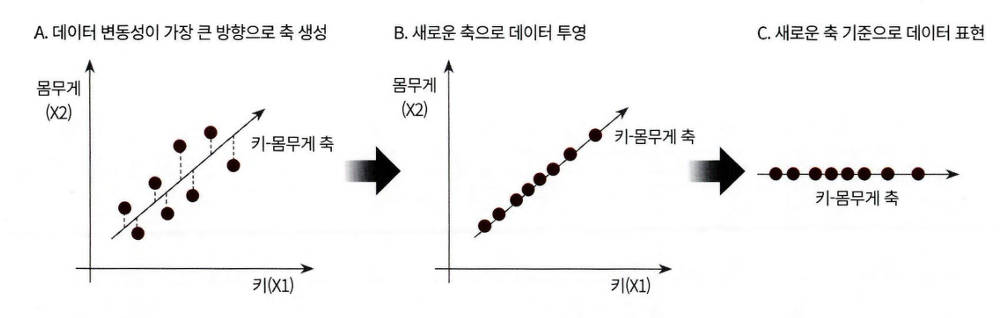

1. 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축 생성
2. 첫 번째 벡터 축에 직각이 되는 벡터(직교 벡터)를 두 번째 벡터 축으로 설정
3. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축 생성
4. 이렇게 생성된 벡터 축에 원본 데이터 투영

  -> 벡터 축의 개수만큼의 차원으로 축소

- 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명 가능

[ 선형대수의 관점 ]
- 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해 후 고유벡터에 입력 데이터를 선형 변환
  - PCA의 주성분 벡터: 고유벡터
  - 입력 데이터의 분산: 고윳값(eigenvector), 고유벡터의 크기

C: 입력 데이터의 공분산 행렬
P: nxn의 직교행렬
$\sum$ : nxn의 정방행렬

$C$ = $P$ $\sum$ $P^T$

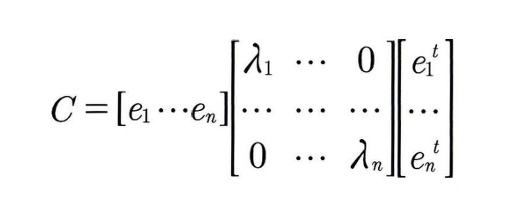


[ 요점 ]
- 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있음
- 이 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA

[ PCA의 과정 ]
1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

```
from sklearn.decomposition import PCA

PCA(n_components=k)
```

- n_components: PCA로 변환할 차원의 수
  - PCA 클래스의 생성 파라미터

##### **03 LDA(Linear Discriminant Analysis)**

---

LDA(Linear Discriminant Analysis): 선형 판별 분석법
- 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원 축소
  - 클래스 간 분산 최대화
  - 클래스 내부 분산 최소화

  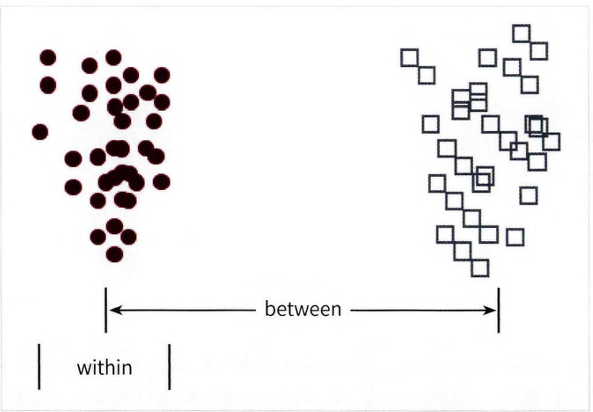

[ PCA와의 유사점/차이점 ]
- < 유사점 >
  - PCA, LDA 모두 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법
- < 차이점 >
  - LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며 차원 축소
  - PCA
    - 입력 데이터의 변동성의 가장 큰 축을 찾음
    - 공분산 행렬 기반
  - LDA: 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
    - 클래스 간 분산과 클래스 내부 분산 행렬 기반

[ LDA 과정 ]
1. 클래스 내부와 클래스 간 분산 행렬을 구함.
  - 이 두 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반
2. 클래스 내부 분산 행렬을 $S_w$, 클래스 간 분산 행렬을 $S_B$라고 하면 다음 식으로 두 행렬을 고유벡터로 분해 가능
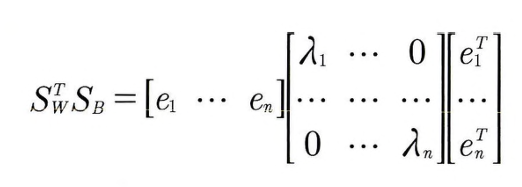


3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수)만큼 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

```
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
```

PCA: 비지도학습, LDA: 지도학습
- 즉, 클래스 결정값이 변환 과정에 필요

##### **04 SVD(Singular Value Decomposition)**

---

SVD(Singular Value Decomposition): 특이값 분해
- PCA와 유사한 행렬 분해 기법
  - PCA: 정방행렬만 적용 가능
  - SVD: 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용

$A$ = $U$ $\sum$ $V^T$

- $\sum$: 대각행렬
  - $\sum$이 위치한 0이 아닌 값: 행렬 $A$의 특이
- 행렬 $U$와$V$에 속한 벡터: 특이벡터(singular vector)
  - 모든 특이벡터는 서로 직교

일반적인 SVD
- $\sum$의 비댁가, 대각원소 중에 특이값이 0인 부분을 모두 제거
- 제거된 $\sum$에 대응되는 $U$와 $V$ 원소도 함께 제거하는 방법으로 차원 축소

  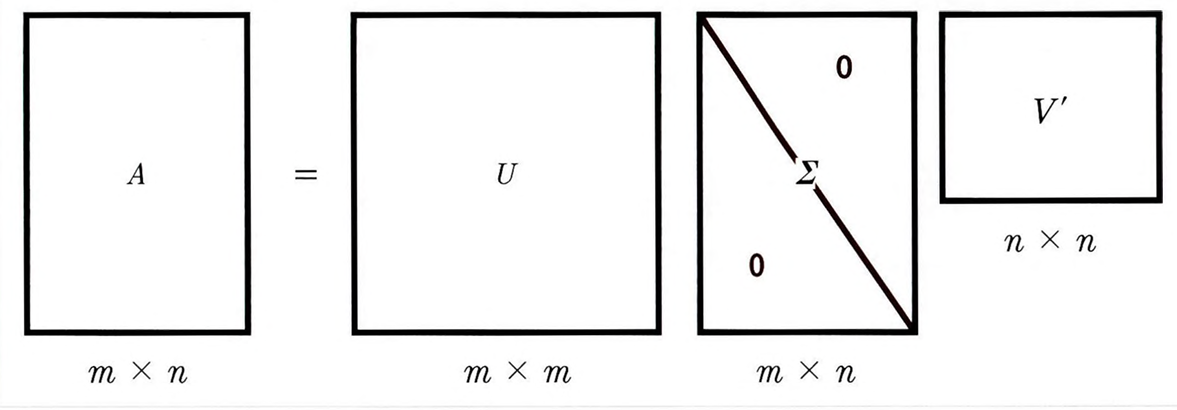

```
import numpy as np
from numpy.linalg import svd
```

```
from scipy.linalg import svd
```

numpy.linalg.svd의 파라미터: 원본 행렬
- U, sigma, V 전치 행렬 반환
- sigma의 경우 대각 행렬이므로 대각에 위치한 0이 아닌 값을 1차원 행렬로 표현

Truncated SVD
- $\sum$의 대각원소 중 상위 몇 개만 추출하여 여기에 대응하는 $U$와 $V$의 원소도 함께 제거하는 방법으로 차원 축소

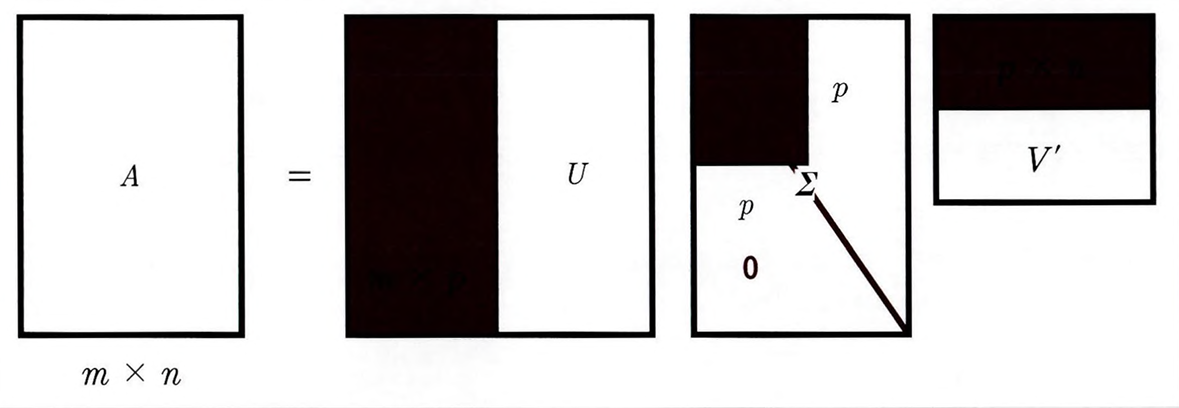

- 원본 행렬을 정확하게 복원 불가
  - 인위적으로 더 작은 차원의 $U$, $\sum$, $V^T$로 분해하기 때문
  - 하지만, 원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원 가능

```
# Truncated SVD는 희소 행렬로만 지원
from scipy.sparse.linalg import svds
```

- svds의 파라미터 k: Sigma 행렬의 특이값의 개수

**사이킷런 TruncatedSVD 클래스를 이용한 변환**

```
from sklearn.decomposition import TruncatedSVD
```

- scipy의 svds와 같이 U, Sigma, Vt 행렬을 반환 X
- fit(), transform()을 호출해 원본 데이터를 몇 개의 주요 component(Truncated SVD의 K component 수)로 차원 축소


##### **05 NMF(Non-Negative Matrix Factorization)**

---

NMF(Non-Negative Matrix Factorization)
- 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 두 개의 기반 양수 행렬로 분해하여 차원 축소
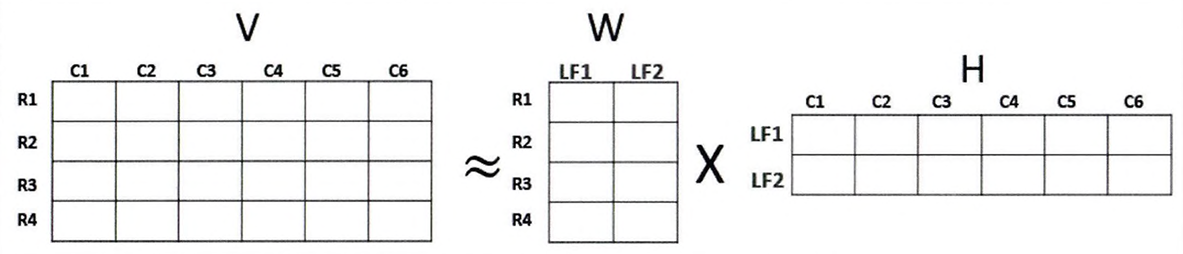

- V: 4x6 matrix
- 분해 행렬 W,H: 잠재 요소를 특성으로 가짐
- W: 4x2 matrix
  - 원본 행에 대해서 잠재 요소의 값이 얼마나 되는 지에 대응
- H: 2x6 matrix
  - 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는 지를 나타내는 행렬

```
from sklearn.decomposition import NMF
```
- NMF의 파라미터 n_components: 변환하고자 하는 component의 개수

### **[ 필사 ]**

##### **02 PCA(Principal Component Analysis)**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


각 품종에 따라 데이터의 분포 2차원 시각화

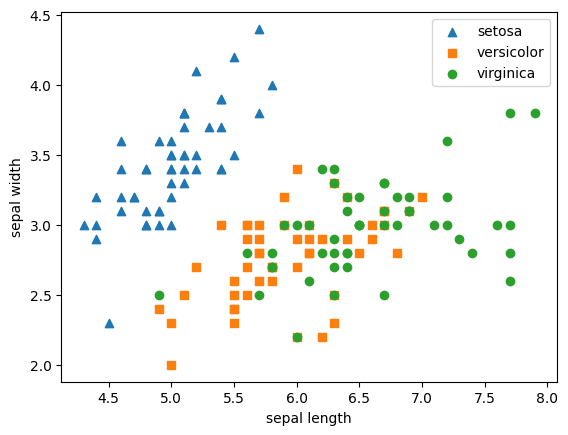

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

Versicolor와 virginica의 경우 sepal width와 sepal length 조건만으로는 분류가 어려워보임

-> PCA 적용

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


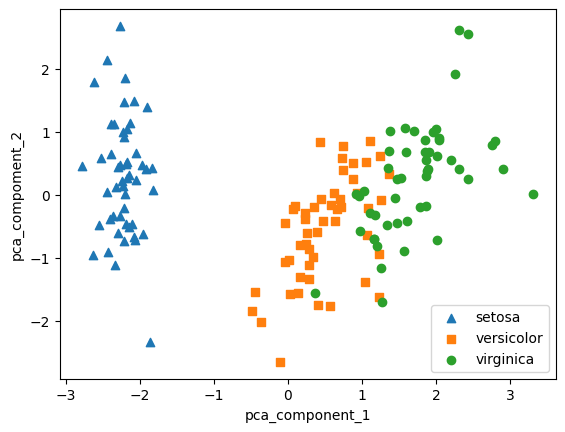

In [ ]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미
markers=['^','s','o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_compoment_2')
plt.show()

PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- pca_component_1이 전체 변동성의 약 72.9% 차지
- pca_component_2가 약 22.8% 차지

분류 모델 적용

기존 데이터

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


4차원 데이터를 2차원으로 PCA 변환한 데이터

In [ ]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음
- 하지만, 4개의 속성이 2개로 50% 감소한 것을 고려하면 PCA 변환 후에도 원본 데이터의 특성을 상당히 유지

**추가 예제 - 신용카드 고객 데이터 세트(Credit Card Clients Data Set)**

In [ ]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df=pd.read_excel('/content/drive/MyDrive/ESAA YB/dataset/default of credit card clients.xls',
                 header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


target: 'default payment next month' {1:'연체',0:'정상 납부'}

In [ ]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
y_target=df['default']
X_features=df.drop('default',axis=1)

<Axes: >

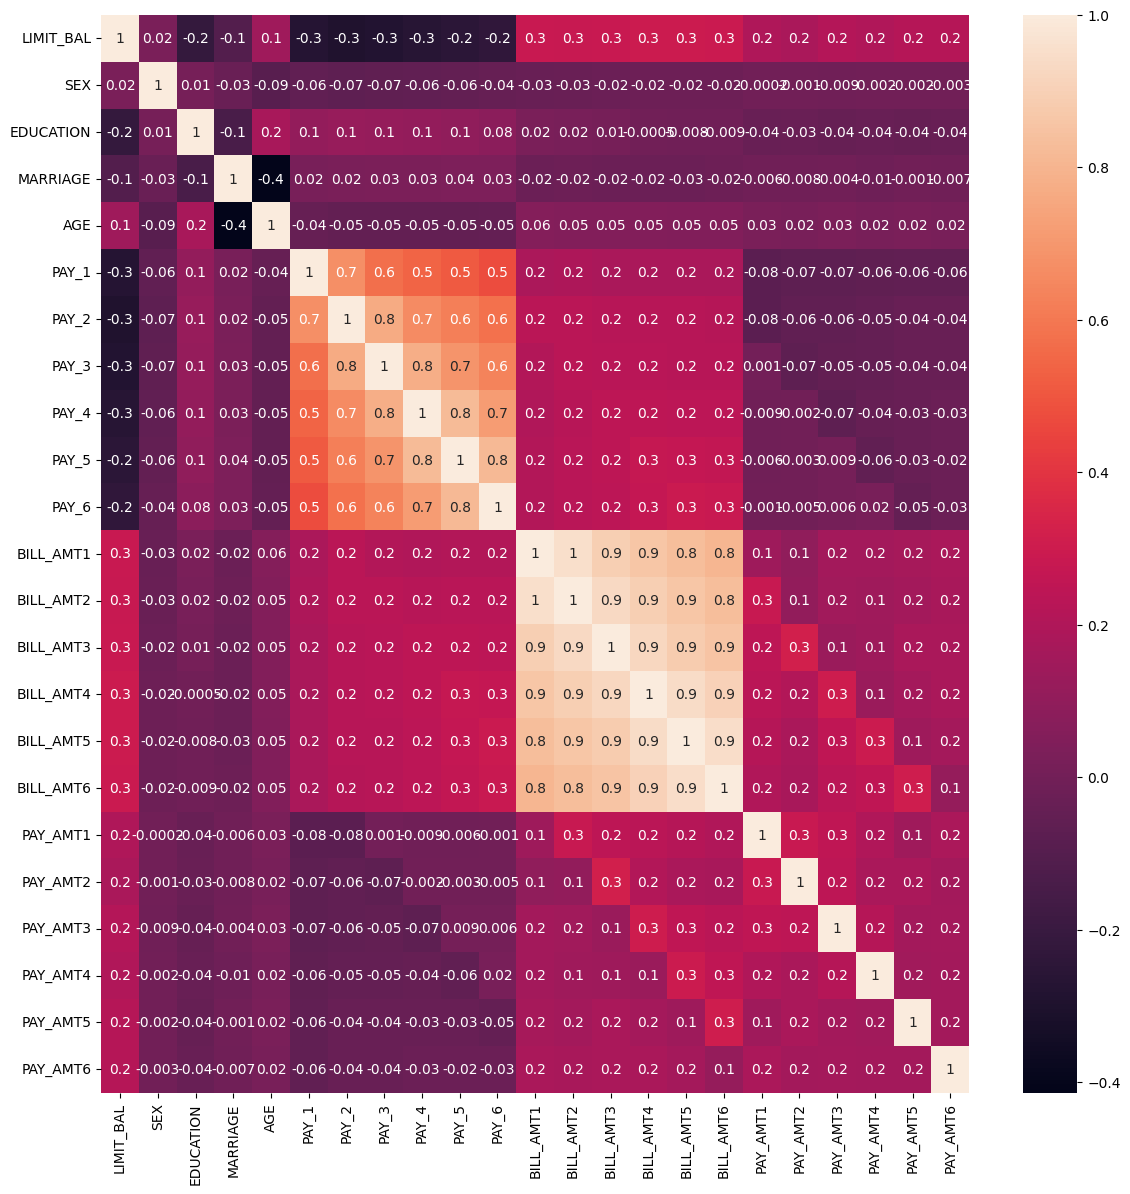

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

BILL_AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 component로 PCA 변환

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])

pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


2개의 component만으로도 6개 속성의 변동성을 약 95% 이상 설명

분류 모델 적용

기존 데이터

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300,random_state=156)
scores=cross_val_score(rcf,X_features,y_target,scoring='accuracy',cv=3)

print('cv=3인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

cv=3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


6개의 component로 PCA 변환한 데이터

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

# 6개의 component를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)

print('cv=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

cv=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7912 0.7974 0.802 ]
PCA 변환 데이터 세트 평균 정확도: 0.7969


##### **03 LDA(Linear Discriminant Analysis)**

붓꽃 데이터 세트에 LDA 적용

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

In [ ]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


LDA 변환된 입력 데이터 값을 2차원으로 품종별로 시각화

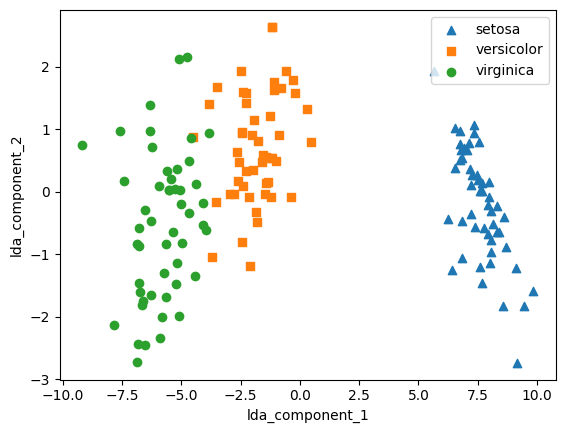

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers=['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

##### **04 SVD(Singular Value Decomposition)**

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
U,Sigma,Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('\nU matrix：\n',np.round(U, 3))
print('\nSigma Value：\n',np.round(Sigma, 3))
print('\nV transpose matrix：\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)

U matrix：
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]

Sigma Value：
 [3.423 2.023 0.463 0.079]

V transpose matrix：
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


데이터 내 row 간 의존성이 있는 경우로 업데이트 후 다시 분해

In [ ]:
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt=svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


Sigma 중 2개가 0으로 변경
- Rank = 2

In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_=Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_=np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD 이용

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n',matrix)

U,Sigma,Vt=svd(matrix,full_matrices=False)
print('\n분해 행렬 차원:',U.shape,Sigma.shape,Vt.shape)
print('\nSigma값 행렬:',Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components=4
U_tr,Sigma_tr,Vt_tr=svds(matrix,k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:',Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n',matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

사이킷런 TruncatedSVD 클래스를 이용한 반환

Text(0, 0.5, 'TruncatedSVD Component 2')

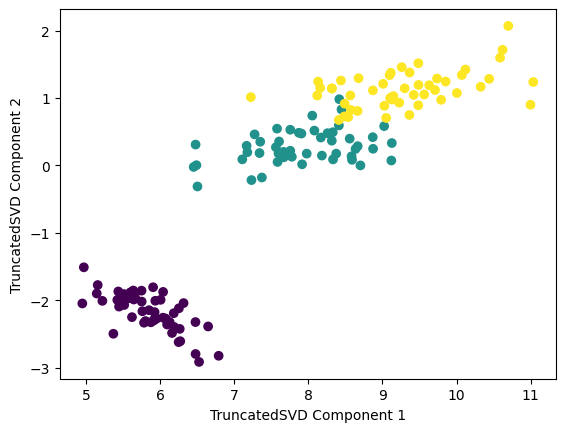

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

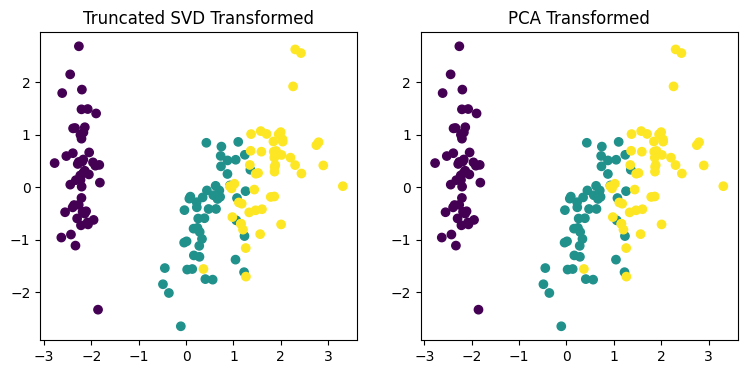

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽, PCA 변환 데이터를 오른쪽에 표현
fig,(ax1,ax2)=plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [ ]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3340762193383805e-15
-1.249000902703301e-16


##### **05 NMF(Non-Negative Matrix Factorization)**

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

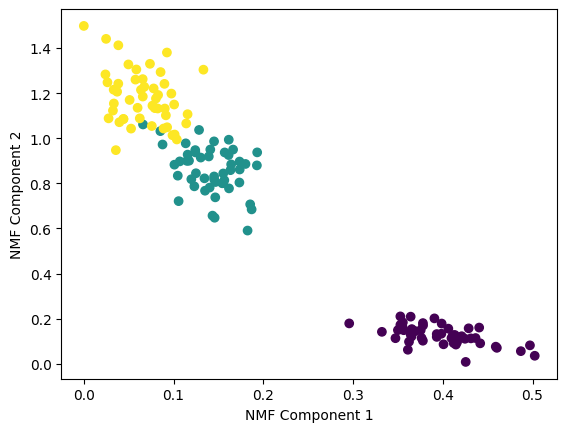

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')